In [2]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'green-taxi-trips-analytics' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

# I/ Market Demand & Seasonality


## Question 1: How does the demand for green taxis fluctuate over time (daily, weekly, monthly, and seasonally)?

In [3]:
# Query the BigQuery View
query_demand_over_time = """
SELECT *
FROM `green-taxi-trips-analytics.views_fordashboard.demand_over_time`

"""

# Run the query and store the result in a DataFrame
demand_over_time_df = client.query(query_demand_over_time).to_dataframe()
demand_over_time_df

,trip_date,year,month,week,weekday,total_trips
0,2008-12-31,2008,12,52,4,7
1,2009-01-01,2009,1,0,5,38
2,2010-09-23,2010,9,38,5,5
3,2019-12-31,2019,12,52,3,16
4,2020-01-01,2020,1,0,4,8462
...,...,...,...,...,...,...
1861,2025-01-31,2025,1,4,6,1545
1862,2025-02-01,2025,2,4,7,17
1863,2025-02-03,2025,2,5,2,6
1864,2025-02-04,2025,2,5,3,7


In [4]:
type(demand_over_time_df)

pandas.core.frame.DataFrame

In [5]:
demand_over_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   trip_date    1866 non-null   dbdate
 1   year         1866 non-null   Int64 
 2   month        1866 non-null   Int64 
 3   week         1866 non-null   Int64 
 4   weekday      1866 non-null   Int64 
 5   total_trips  1866 non-null   Int64 
dtypes: Int64(5), dbdate(1)
memory usage: 96.7 KB


In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [8]:
# Convert trip_date to datetime format
demand_over_time_df['trip_date'] = pd.to_datetime(demand_over_time_df['trip_date'])
demand_over_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   trip_date    1866 non-null   datetime64[ns]
 1   year         1866 non-null   Int64         
 2   month        1866 non-null   Int64         
 3   week         1866 non-null   Int64         
 4   weekday      1866 non-null   Int64         
 5   total_trips  1866 non-null   Int64         
dtypes: Int64(5), datetime64[ns](1)
memory usage: 96.7 KB


In [9]:
demand_over_time_df.year.value_counts(normalize=True)

,proportion
year,
2020,0.196141
2024,0.196141
2021,0.195606
2022,0.195606
2023,0.195606
2025,0.018757
2008,0.000536
2009,0.000536
2010,0.000536


In [10]:
# Extract the current year
from datetime import datetime
current_year = datetime.now().year
current_year

2025

In [11]:
# Filter rows where the year is between 2020 and the current year (inclusive)
filtered_demand_over_time_df = demand_over_time_df[(demand_over_time_df['year'] >= 2020) & (demand_over_time_df['year'] <= current_year)]
filtered_demand_over_time_df.year.value_counts(normalize=True)

,proportion
year,
2020,0.196563
2024,0.196563
2021,0.196026
2022,0.196026
2023,0.196026
2025,0.018797


In [12]:
# 1. Daily Demand Trend
fig_daily = px.line(
    filtered_demand_over_time_df,
    x='trip_date',
    y='total_trips',
    title='Daily Taxi Demand Over Time',
    labels={'trip_date': 'Date', 'total_trips': 'Number of Trips'},
    template='plotly_dark'
)
fig_daily.show()

In [13]:
# 2. Weekly Demand Trend
weekly_demand = filtered_demand_over_time_df.groupby('week')['total_trips'].sum().reset_index()
fig_weekly = px.line(
    weekly_demand,
    x='week',
    y='total_trips',
    title='Weekly Taxi Demand Trend',
    labels={'week': 'Week Number', 'total_trips': 'Number of Trips'},
    template='plotly_dark'
)
fig_weekly.show()

In [14]:
# 3. Monthly Demand Trend
monthly_demand = filtered_demand_over_time_df.groupby('month')['total_trips'].sum().reset_index()
fig_monthly = px.bar(
    monthly_demand,
    x='month',
    y='total_trips',
    title='Monthly Taxi Demand Trend',
    labels={'month': 'Month', 'total_trips': 'Number of Trips'},
    template='plotly_dark'
)
fig_monthly.show()

In [15]:
filtered_demand_over_time_df['quarter'] = filtered_demand_over_time_df['trip_date'].dt.to_period("Q")
filtered_demand_over_time_df

<ipython-input-15-9d11e34f1b47>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,trip_date,year,month,week,weekday,total_trips,quarter
4,2020-01-01,2020,1,0,4,8462,2020Q1
5,2020-01-02,2020,1,0,5,9079,2020Q1
6,2020-01-03,2020,1,0,6,10236,2020Q1
7,2020-01-04,2020,1,0,7,10317,2020Q1
8,2020-01-05,2020,1,1,1,8190,2020Q1
...,...,...,...,...,...,...,...
1861,2025-01-31,2025,1,4,6,1545,2025Q1
1862,2025-02-01,2025,2,4,7,17,2025Q1
1863,2025-02-03,2025,2,5,2,6,2025Q1
1864,2025-02-04,2025,2,5,3,7,2025Q1


In [16]:
seasonal_demand = filtered_demand_over_time_df.groupby('quarter')['total_trips'].sum().reset_index()
seasonal_demand

,quarter,total_trips
0,2020Q1,785438
1,2020Q2,86973
2,2020Q3,127025
3,2020Q4,138296
4,2021Q1,112961
5,2021Q2,140357
6,2021Q3,153672
7,2021Q4,211399
8,2022Q1,176234
9,2022Q2,183970


In [17]:
# Convert 'quarter' column to string
seasonal_demand['quarter'] = seasonal_demand['quarter'].astype(str)

In [18]:
# 4. Seasonal Demand Trend (Grouping by Quarters)
fig_seasonal = px.line(
    seasonal_demand,
    x='quarter',
    y='total_trips',
    title='Seasonal Taxi Demand Trend',
    labels={'quarter': 'Quarter', 'total_trips': 'Number of Trips'},
    template='plotly_dark'
)
fig_seasonal.show()

## Question 2: What are the peak hours for green taxi trips in different boroughs and zones?

In [19]:
# Function to execute a BigQuery query and return a DataFrame

def query_to_dataframe(query: str) -> pd.DataFrame:
    """
    Executes a SQL query in BigQuery and returns a Pandas DataFrame.

    Parameters:
    - query (str): The SQL query to execute.

    Return:
    - pd.DataFrame : The DataFrame containing the results of the query.
    """
    try:
        df = client.query(query).to_dataframe()
        print(f"Query executed successfully. Retrieved {df.shape[0]} rows.")
        return df
    except Exception as e:
        print(f"Error executing query: {e}")
        return pd.DataFrame()


In [20]:
query_peak_hours_by_zone = """
SELECT *
FROM `green-taxi-trips-analytics.views_fordashboard.peak_hours_by_zone`
"""
peak_hours_by_zone_df = query_to_dataframe(query_peak_hours_by_zone)
peak_hours_by_zone_df.head()

Query executed successfully. Retrieved 5430 rows.


,pickup_hour,Borough,Zone,total_trips
0,8,Manhattan,East Harlem North,54176
1,9,Manhattan,East Harlem North,51923
2,7,Manhattan,East Harlem North,50435
3,18,Manhattan,East Harlem North,47123
4,17,Manhattan,East Harlem South,46878


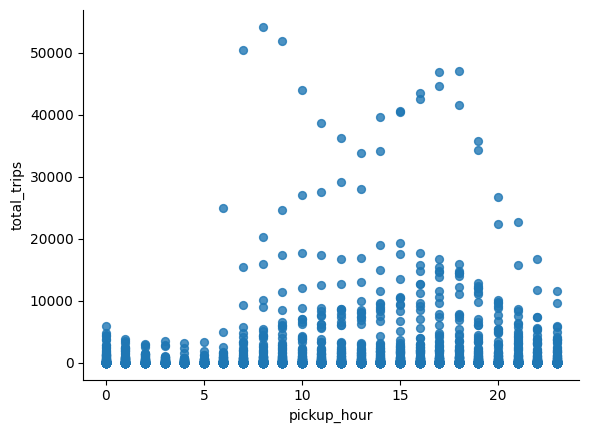

In [ ]:
# @title pickup_hour vs total_trips

from matplotlib import pyplot as plt
peak_hours_by_zone_df.plot(kind='scatter', x='pickup_hour', y='total_trips', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
peak_hours_by_zone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pickup_hour  5430 non-null   Int64 
 1   Borough      5430 non-null   object
 2   Zone         5430 non-null   object
 3   total_trips  5430 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 180.4+ KB


In [22]:
fig_borough = px.line(
    peak_hours_by_zone_df.groupby(["pickup_hour", "Borough"])["total_trips"].sum().reset_index(),
    x="pickup_hour",
    y="total_trips",
    color="Borough",
    title="Viewing peak hours by Borough",
    labels={"pickup_hour": "Heure", "total_trips": "Nombre de courses"},
    template="plotly_dark"
)

fig_borough.show()

In [23]:
# Pivot table pour avoir une matrice heures x Borough
pivot_df = peak_hours_by_zone_df.pivot_table(
    values="total_trips",
    index="pickup_hour",
    columns="Borough",
    aggfunc="sum"
)

pivot_df.head()

Borough,Bronx,Brooklyn,EWR,Manhattan,N/A,Queens,Staten Island,Unknown
pickup_hour,,,,,,,,
0,3052,15399,6,24030,66,28657,16,94
1,1989,11747,5,14085,31,20824,6,68
2,1250,8939,2,8059,43,14366,6,59
3,888,6616,1,5133,21,12562,8,71
4,1074,4206,1,4252,26,11286,6,47


In [24]:
# Remplacement des NaN par 0
#pivot_df = pivot_df.fillna(0)

# Heatmap of the busiest areas by hour
# Replace NaN with 0 (uncomment this line)
pivot_df = pivot_df.fillna(0)

# Heatmap of the busiest areas by hour
fig_zone = go.Figure(
    data=go.Heatmap(
        z=pivot_df.values,
        x=pivot_df.columns,
        y=pivot_df.index,
        colorscale="YlGnBu"
    )
)

fig_zone.update_layout(
    title="Heatmap des Heures de Pointe par Arrondissement",
    xaxis_title="Borough",
    yaxis_title="Hour",
    template="plotly_dark"
)

fig_zone.show()

In [25]:
# Aggregate trips per borough and hour
borough_hourly_demand = peak_hours_by_zone_df.groupby(["Borough", "pickup_hour"])["total_trips"].sum().reset_index()
borough_hourly_demand.head()

,Borough,pickup_hour,total_trips
0,Bronx,0,3052
1,Bronx,1,1989
2,Bronx,2,1250
3,Bronx,3,888
4,Bronx,4,1074


In [26]:
# Create a facet bar chart
fig_facet = px.bar(
    borough_hourly_demand,
    x="pickup_hour",
    y="total_trips",
    color="Borough",
    facet_col="Borough",
    facet_col_wrap=3,  # Arrange in rows of 3
    title="Peak Hours for green Taxi Trips by Borough",
    labels={"pickup_hour": "Hour of the Day", "total_trips": "Total Trips"},
    template="plotly_dark"
)

fig_facet.update_layout(
    showlegend=False,
    height=600,
    width=1200
)

fig_facet.show()

# II/ Customer Behavior & Ride Characteristics

## Question 4: What are the most popular pickup and drop-off locations, and how do they change over time?

In [27]:
query_popular_pickup_dropoff = """
SELECT *
FROM `green-taxi-trips-analytics.views_fordashboard.popular_pickup_dropoff`
"""
popular_pickup_dropoff_df = query_to_dataframe(query_popular_pickup_dropoff)
popular_pickup_dropoff_df.head()

Query executed successfully. Retrieved 1411233 rows.


,trip_date,year,month,week,weekday,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,total_trips
0,2023-10-12,2023,10,41,5,N/A,Outside of NYC,Brooklyn,Bushwick South,1
1,2023-10-29,2023,10,44,1,Queens,Maspeth,Brooklyn,Williamsburg (North Side),1
2,2023-10-07,2023,10,40,7,Queens,Woodhaven,Queens,Forest Hills,1
3,2023-10-27,2023,10,43,6,Brooklyn,Prospect-Lefferts Gardens,Brooklyn,Crown Heights North,1
4,2023-10-04,2023,10,40,4,Brooklyn,Flatbush/Ditmas Park,Brooklyn,Stuyvesant Heights,1


In [28]:
popular_pickup_dropoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411233 entries, 0 to 1411232
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   trip_date        1411233 non-null  dbdate
 1   year             1411233 non-null  Int64 
 2   month            1411233 non-null  Int64 
 3   week             1411233 non-null  Int64 
 4   weekday          1411233 non-null  Int64 
 5   pickup_borough   1411233 non-null  object
 6   pickup_zone      1411233 non-null  object
 7   dropoff_borough  1411233 non-null  object
 8   dropoff_zone     1411233 non-null  object
 9   total_trips      1411233 non-null  Int64 
dtypes: Int64(5), dbdate(1), object(4)
memory usage: 114.4+ MB


In [29]:
popular_pickup_dropoff_df.year.value_counts(normalize=True)

,proportion
year,
2020,0.25735
2021,0.203512
2022,0.19523
2023,0.177985
2024,0.155191
2025,0.01069
2009,0.000024
2019,0.000011
2008,0.000005


In [30]:
# Filter rows where the year is between 2020 and the current year (inclusive)
filtered_popular_pickup_dropoff_df = popular_pickup_dropoff_df[(popular_pickup_dropoff_df['year'] >= 2020) & (popular_pickup_dropoff_df['year'] <= current_year)]

In [31]:
# Aggregate total trips by month
monthly_trips = (
    filtered_popular_pickup_dropoff_df.groupby(["year", "month"])["total_trips"]
    .sum()
    .reset_index()
)
monthly_trips.head()

,year,month,total_trips
0,2020,1,314544
1,2020,2,303283
2,2020,3,167611
3,2020,4,22709
4,2020,5,28927


In [32]:

# Convert to datetime
monthly_trips["date"] = pd.to_datetime(
    monthly_trips["year"].astype(str) + "-" + monthly_trips["month"].astype(str)
)

# Plot
fig = px.line(
    monthly_trips,
    x="date",
    y="total_trips",
    markers=True,
    title="Monthly Trends in Taxi Demand",
    labels={"total_trips": "Total Trips", "date": "Date"},
)

fig.update_traces(line=dict(width=3))
fig.update_layout(template="plotly_dark", xaxis_tickangle=-45)
fig.show()


In [34]:
# Aggregate trips by pickup zone
top_pickups = (
    filtered_popular_pickup_dropoff_df.groupby("pickup_zone")["total_trips"]
    .sum()
    .nlargest(10)
    .reset_index()
)

top_pickups.head()

,pickup_zone,total_trips
0,East Harlem North,676910
1,East Harlem South,489283
2,Central Harlem,257461
3,Morningside Heights,197328
4,Forest Hills,173524


In [35]:
# Plot
fig = px.bar(
    top_pickups,
    x="total_trips",
    y="pickup_zone",
    orientation="h",
    text="total_trips",
    title="Top 10 Pickup Locations",
    labels={"total_trips": "Total Trips", "pickup_zone": "Pickup Zone"},
)

fig.update_traces(marker_color="royalblue", texttemplate="%{text:,}", textposition="inside")
fig.update_layout(template="plotly_dark", xaxis_title="Total Trips")
fig.show()

In [36]:
# Aggregate total trips by borough and weekday
heatmap_data = (
    filtered_popular_pickup_dropoff_df.groupby(["pickup_borough", "weekday"])["total_trips"]
    .sum()
    .unstack()
)

heatmap_data.head()

weekday,1,2,3,4,5,6,7
pickup_borough,,,,,,,
Bronx,11401,13506,13103,15274,15370,17648,15076
Brooklyn,83229,71213,75308,80780,84186,86237,103049
EWR,7,3,10,9,7,7,13
Manhattan,220266,314876,332454,346777,352518,342394,255748
N/A,439,513,409,471,514,590,575


In [37]:

# Create heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale="viridis",
        colorbar=dict(title="Total Trips"),
    )
)

fig.update_layout(
    title="Taxi Demand Heatmap by Borough & Weekday",
    xaxis_title="Weekday",
    yaxis_title="Pickup Borough",
    template="plotly_dark",
)
fig.show()


## Question 5: What is the average trip distance, and how does it vary by borough, time of day, and season?

In [39]:
query_avg_trip_distance_analysis = """
SELECT *
FROM `green-taxi-trips-analytics.views_fordashboard.avg_trip_distance_analysis`
"""
avg_trip_distance_analysis_df = query_to_dataframe(query_avg_trip_distance_analysis)
avg_trip_distance_analysis_df.head()

Query executed successfully. Retrieved 373563 rows.


,trip_date,year,month,season,pickup_hour,pickup_borough,dropoff_borough,avg_trip_distance
0,2008-12-31,2008,12,Winter,0,Brooklyn,Brooklyn,6.290
1,2008-12-31,2008,12,Winter,17,Manhattan,Manhattan,5.360
2,2008-12-31,2008,12,Winter,19,Manhattan,Unknown,3.290
3,2008-12-31,2008,12,Winter,22,Manhattan,Unknown,2.250
4,2008-12-31,2008,12,Winter,23,Brooklyn,Brooklyn,16.235


In [40]:
# Filter rows where the year is between 2020 and the current year (inclusive)
filtered_avg_trip_distance_analysis_df = avg_trip_distance_analysis_df[(avg_trip_distance_analysis_df['year'] >= 2020) & (avg_trip_distance_analysis_df['year'] <= current_year)]
filtered_avg_trip_distance_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373529 entries, 34 to 373562
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_date          373529 non-null  dbdate 
 1   year               373529 non-null  Int64  
 2   month              373529 non-null  Int64  
 3   season             373529 non-null  object 
 4   pickup_hour        373529 non-null  Int64  
 5   pickup_borough     373529 non-null  object 
 6   dropoff_borough    373529 non-null  object 
 7   avg_trip_distance  373529 non-null  float64
dtypes: Int64(3), dbdate(1), float64(1), object(3)
memory usage: 26.7+ MB


In [41]:
# Convert trip_date to datetime
filtered_avg_trip_distance_analysis_df["trip_date"] = pd.to_datetime(filtered_avg_trip_distance_analysis_df["trip_date"])

# Aggregate average trip distance by date
daily_avg_distance = (
    filtered_avg_trip_distance_analysis_df.groupby("trip_date")["avg_trip_distance"]
    .mean()
    .reset_index()
)

daily_avg_distance.head()

<ipython-input-41-09532ef2363a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,trip_date,avg_trip_distance
0,2020-01-01,7.489574
1,2020-01-02,8.200537
2,2020-01-03,7.634600
3,2020-01-04,7.648362
4,2020-01-05,7.220669


In [42]:
# Plot
fig = px.line(
    daily_avg_distance,
    x="trip_date",
    y="avg_trip_distance",
    title="Average Trip Distance Over Time",
    labels={"avg_trip_distance": "Avg Trip Distance (miles)", "trip_date": "Date"},
    markers=True,
)

fig.update_traces(line=dict(width=3))
fig.update_layout(template="plotly_dark", xaxis_tickangle=-45)
fig.show()


## Question 6: How many trips have only one passenger versus multiple passengers, and does this change seasonally?

In [43]:
query_passenger_trends_by_season = """
SELECT *
FROM `green-taxi-trips-analytics.views_fordashboard.passenger_trends_by_season`
"""
passenger_trends_by_season_df = query_to_dataframe(query_passenger_trends_by_season)
passenger_trends_by_season_df.head()

Query executed successfully. Retrieved 3726 rows.


,trip_date,year,month,season,passenger_category,total_trips
0,2008-12-31,2008,12,Winter,Single Passenger,7
1,2009-01-01,2009,1,Winter,Single Passenger,32
2,2009-01-01,2009,1,Winter,Multiple Passengers,6
3,2010-09-23,2010,9,Fall,Single Passenger,5
4,2019-12-31,2019,12,Winter,Single Passenger,15


In [44]:
# Filter rows where the year is between 2020 and the current year (inclusive)
filtered_passenger_trends_by_season_df = passenger_trends_by_season_df[(passenger_trends_by_season_df['year'] >= 2020) & (passenger_trends_by_season_df['year'] <= current_year)]
filtered_passenger_trends_by_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3720 entries, 6 to 3725
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trip_date           3720 non-null   dbdate
 1   year                3720 non-null   Int64 
 2   month               3720 non-null   Int64 
 3   season              3720 non-null   object
 4   passenger_category  3720 non-null   object
 5   total_trips         3720 non-null   Int64 
dtypes: Int64(3), dbdate(1), object(2)
memory usage: 214.3+ KB


In [45]:
# Aggregate total trips by passenger category
passenger_counts = filtered_passenger_trends_by_season_df.groupby("passenger_category")["total_trips"].sum().reset_index()
passenger_counts

,passenger_category,total_trips
0,Multiple Passengers,539785
1,Single Passenger,3237684


In [46]:
# Create a donut chart
fig = px.pie(
    passenger_counts,
    names="passenger_category",
    values="total_trips",
    title="Proportion of Single vs. Multiple Passenger Trips",
    hole=0.4,  # This makes it a donut chart
    color="passenger_category",
    color_discrete_map={"Single Passenger": "red", "Multiple Passengers": "blue"}
)

fig.update_traces(textinfo="percent+label")

# Show the figure
fig.show()

In [47]:
# Aggregate data
treemap_data = filtered_passenger_trends_by_season_df.groupby(["season", "passenger_category"])["total_trips"].sum().reset_index()

# Define a seasonal color palette
season_colors = {
    "Winter": "blue",
    "Spring": "green",
    "Summer": "green",
    "Fall": "orange",
}

# Create the treemap
fig = px.treemap(
    treemap_data,
    path=["season", "passenger_category"],
    values="total_trips",
    color="season",
    color_discrete_map=season_colors,
    title="Passenger Distribution by Season (Treemap)",
)

fig.update_traces(textinfo="label+percent entry")

# Show the plot
fig.show()


In [48]:
# Convert trip_date to datetime
filtered_passenger_trends_by_season_df["trip_date"] = pd.to_datetime(filtered_passenger_trends_by_season_df["trip_date"])

<ipython-input-48-b108a65472d3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
# Stacked Area Chart: Passenger Distribution Over Time

  # This helps visualize the proportion of single vs. multiple passengers over time.

fig = px.area(
    filtered_passenger_trends_by_season_df,
    x="trip_date",
    y="total_trips",
    color="passenger_category",
    title="Proportion of Single vs. Multiple Passenger Trips Over Time",
    labels={"total_trips": "Total Trips", "trip_date": "Date", "passenger_category": "Passenger Category"},
)

fig.update_layout(template="plotly_dark")
fig.show()
